# Analysis of DOCKSTRING target screens

In [1]:
%reload_ext autoreload
%autoreload 2

import rdkit
rdkit.Chem.Draw.IPythonConsole.ipython_maxProperties = -1

import os
import numpy as np
import dgym as dg
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os

path = '../../../dgym-data/'

dockstring_dir = f'{path}/dockstring_targets/'
files = os.listdir(dockstring_dir)
targets = sorted([f for f in files if 'target' in f])
targets_map = {str(idx): t.split('_')[0] for (idx, t) in enumerate(targets)}

In [3]:
path = '../../../dgym-data/analysis/screen/dockstring/'
files = os.listdir(path)

results = []
for file in files:
    if file.endswith('tsv'):
        # get tsv
        result = pd.read_csv(path + file, sep='\t')
        
        # metadata
        target_index, scorer = tuple(file.replace('.tsv', '').split('_')[-2:])
        result['target_index'] = target_index
        result['scorer'] = scorer
        
        # add to results
        results.append(result)

df = pd.concat(results)
df['target'] = df['target_index'].apply(targets_map.get)
df = df.reset_index(drop=True)

In [4]:
(
    df.query('scorer == "vina"')
    .groupby('target')['affinity']
    .agg(['mean', 'median', 'std', 'count'])
    .sort_values('mean')
)

,mean,median,std,count
target,,,,
BACE1,5.250181,5.252590,0.533688,600
PTPN1,5.469473,5.443874,0.508264,298
CASP3,5.594781,5.574994,0.491602,600
HMGCR,5.649206,5.615602,0.541658,285
AR,5.665581,5.693187,0.809926,284
CA2,5.678567,5.635834,0.545427,582
KIT,5.946581,5.962585,0.660647,585
ESR2,5.952900,5.930663,0.583855,597
REN,5.958157,5.841143,0.692900,600


/home/mrr/miniconda3/envs/chodera/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'eCDF of docking scores | scorer = VINA')

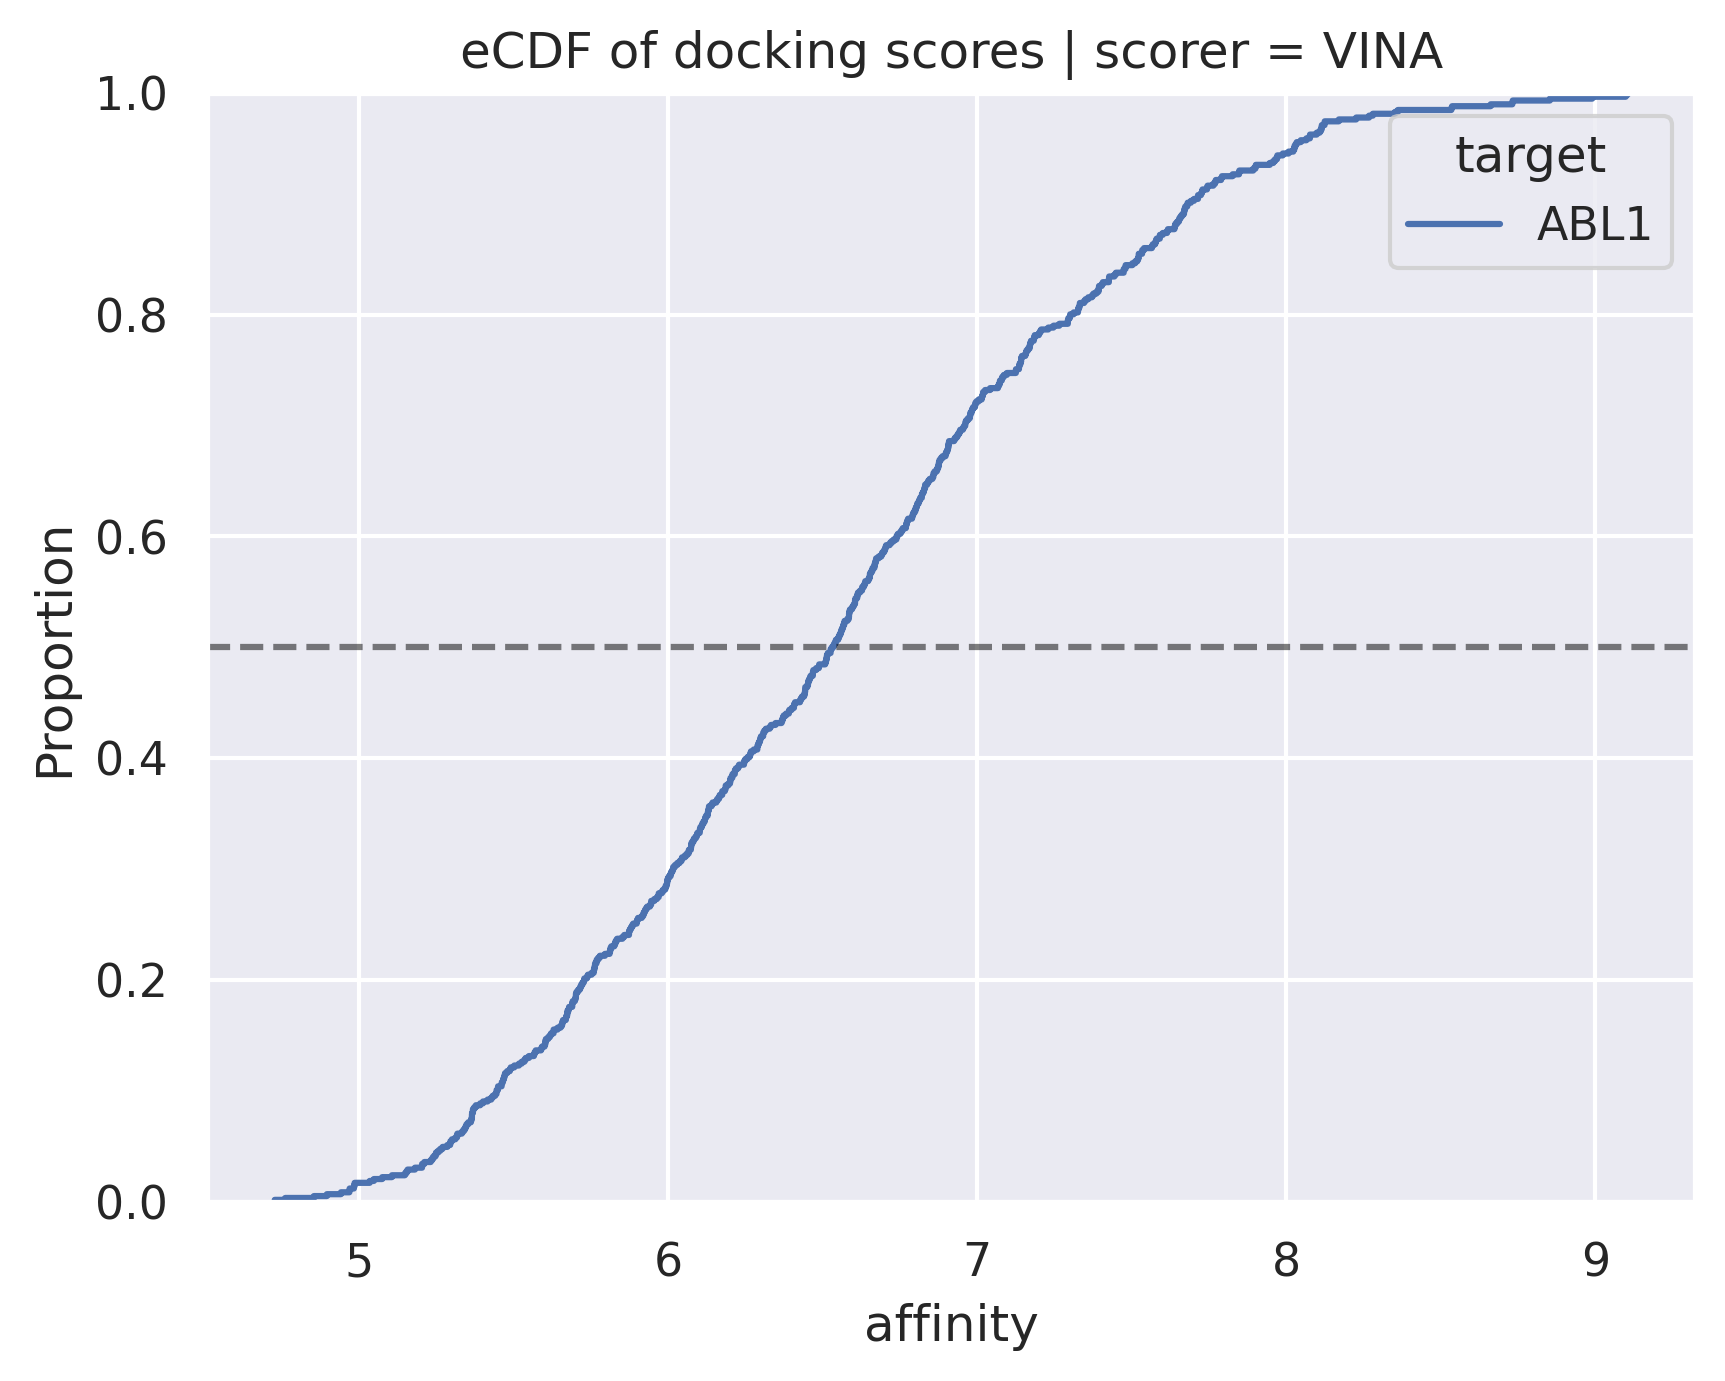

In [7]:
import seaborn as sns

plt.figure(dpi=300)
sns.set()
sns.ecdfplot(
    df.query('scorer == "vina"').query('target in ["ABL1"]'),
    x='affinity',
    # y='affinity',
    hue='target',
)

plt.axhline(0.5, linestyle='--', color='black', alpha=0.5)
plt.title('eCDF of docking scores | scorer = VINA')

In [27]:
df.query('scorer == "gnina"').query('target == "CASP3"').sort_values('affinity', ascending=False)['affinity'] > 6.7

70883     True
70888     True
70881     True
71367     True
70877     True
         ...  
70830    False
70836    False
70843    False
70552    False
70553    False
Name: affinity, Length: 900, dtype: bool